In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
df.shape

(1000, 8)

### Missing values

In [4]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

### check duplicates

In [7]:
df.duplicated().sum()

0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [11]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [12]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [17]:
for feature in df.columns:
    if df[feature].dtypes == 'object':
        print(f'Categories in "{feature}"" variable:  {df[feature].unique()}')

Categories in "gender"" variable:  ['female' 'male']
Categories in "race/ethnicity"" variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in "parental level of education"" variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in "lunch"" variable:  ['standard' 'free/reduced']
Categories in "test preparation course"" variable:  ['none' 'completed']


In [21]:
# define numerical & categorical columns

cat_features = [feature for feature in df.columns if df[feature].dtypes == 'object']
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'object']


In [23]:
# print columns
print('We have {} numerical features : {}'.format(len(numerical_features), numerical_features))
print('\nWe have {} categorical features : {}'.format(len(cat_features), cat_features))

We have 3 numerical features : ['math score', 'reading score', 'writing score']

We have 5 categorical features : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [24]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [27]:
df['total score'] =df['math score']+df['reading score']+df['writing score']
df['average'] = df['total score'] / 3
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


In [41]:
reading = df[df['reading score'] == 100]['average'].count()
math = df[df['math score'] == 100]['average'].count()
writing = df[df['writing score'] == 100]['average'].count()

print(f'Number of students with full mark in Reading: {reading}')
print(f'Number of students with full mark in Maths: {math}')
print(f'Number of students with full mark in Writing: {writing}')

Number of students with full mark in Reading: 17
Number of students with full mark in Maths: 7
Number of students with full mark in Writing: 14


In [42]:
reading = df[df['reading score'] <= 20]['average'].count()
math = df[df['math score'] <= 20]['average'].count()
writing = df[df['writing score'] <= 20]['average'].count()

print(f'Number of students with less than 20 mark in Reading: {reading}')
print(f'Number of students with less than 20 mark in Maths: {math}')
print(f'Number of students with less than 20 mark in Writing: {writing}')

Number of students with less than 20 mark in Reading: 1
Number of students with less than 20 mark in Maths: 4
Number of students with less than 20 mark in Writing: 3


## Visualization

<AxesSubplot: xlabel='average', ylabel='Count'>

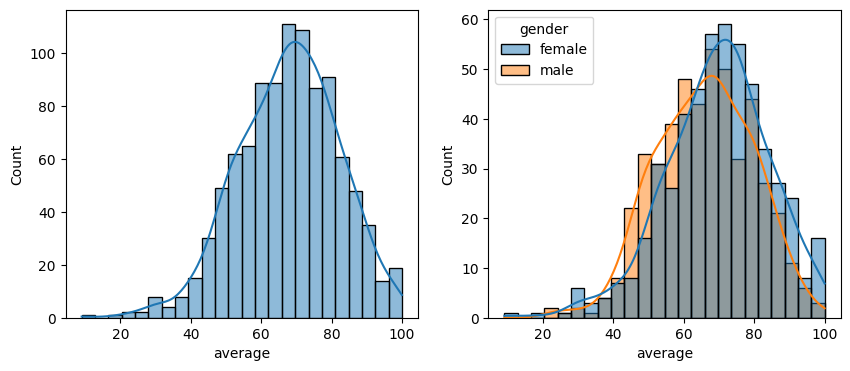

In [49]:
fig, ax = plt.subplots(1,2,figsize=(10,4))
plt.subplot(121)
sns.histplot(data=df,x='average',kde=True)
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')

<AxesSubplot: xlabel='total score', ylabel='Count'>

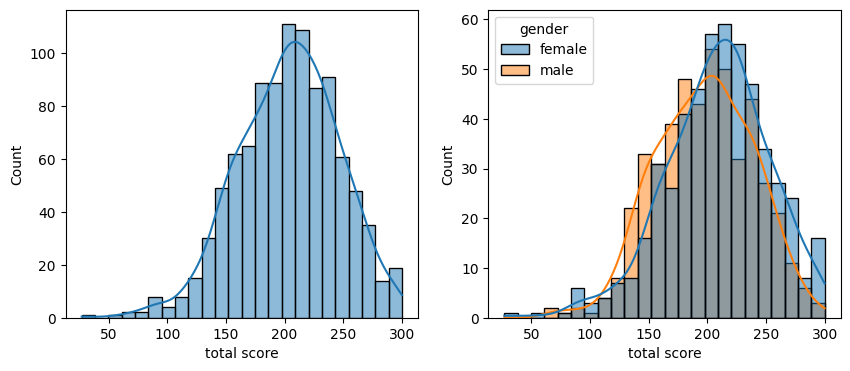

In [62]:
fig, ax = plt.subplots(1,2,figsize=(10,4))
plt.subplot(121)
sns.histplot(data=df,x='total score',kde=True)
plt.subplot(122)
sns.histplot(data=df,x='total score',kde=True,hue='gender')

In [63]:
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


<AxesSubplot: xlabel='average', ylabel='Count'>

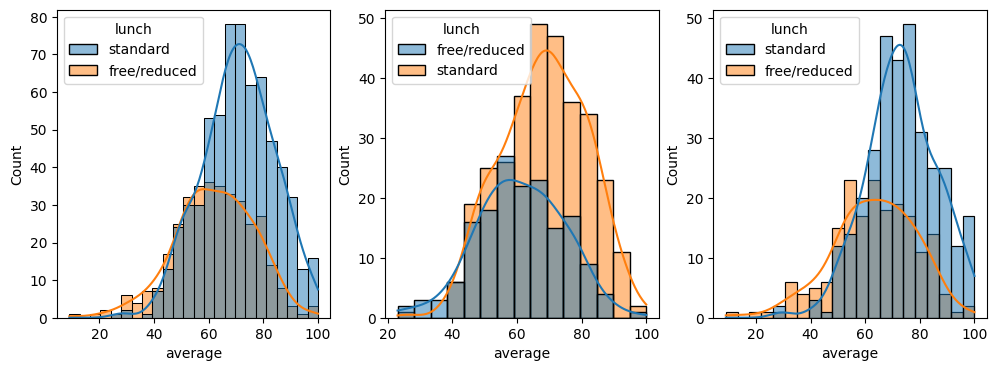

In [80]:
fig, ax = plt.subplots(1,3,figsize=(12,4))
plt.subplot(131)
sns.histplot(data=df,x='average',hue='lunch',kde=True)
plt.subplot(132)
sns.histplot(data=df[df['gender']=='male'],x='average',hue='lunch',kde=True)
plt.subplot(133)
sns.histplot(data=df[df['gender']=='female'],x='average',hue='lunch',kde=True)

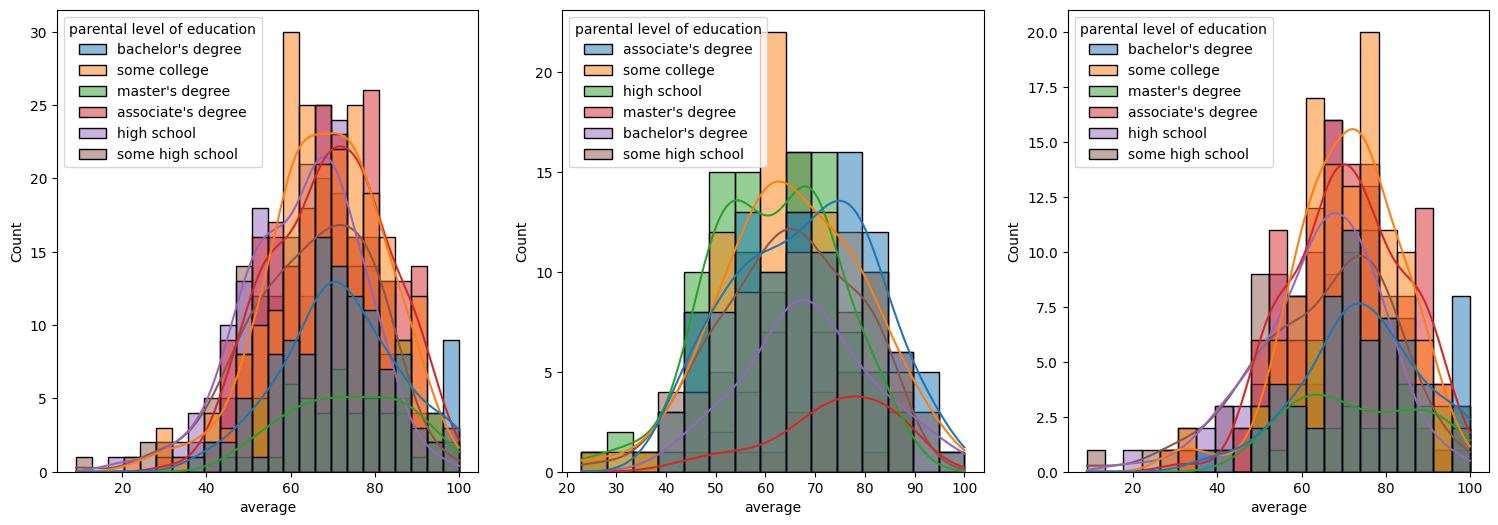

In [87]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='parental level of education')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental level of education')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental level of education')
plt.show()

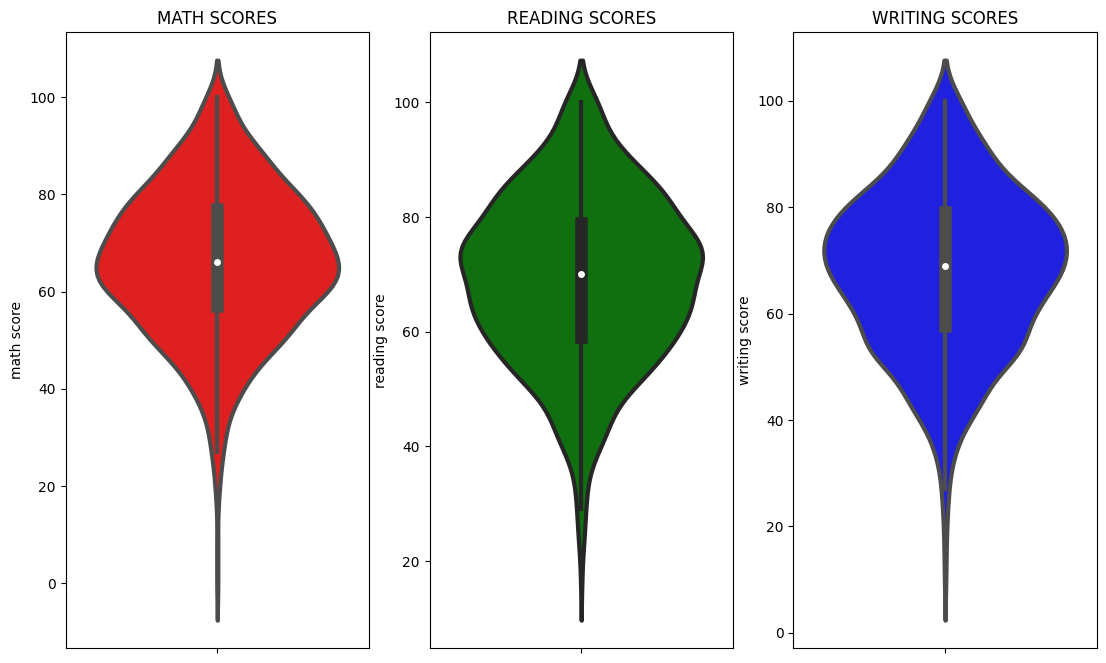

In [88]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score',data=df,color='blue',linewidth=3)
plt.show()

### univariate analysis

In [95]:
# f,ax=plt.subplots(1,2,figsize=(20,5))
# print('ax:::',ax)
# sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
# for container in ax[0].containers:
#     ax[0].bar_label(container,color='black',size=20)
    
# plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
# plt.show()

In [102]:
gender_group = df.groupby('gender').mean()
gender_group

,math score,reading score,writing score,total score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


In [108]:
gender_group['average'][0]

69.56949806949807

In [111]:
female_score = [gender_group['average'][0], gender_group['math score'][0]]
male_score= [gender_group['average'][1], gender_group['math score'][1]]
print(male_score,female_score)

[65.8374827109267, 68.72821576763485] [69.56949806949807, 63.633204633204635]


In [123]:
X = ['Total Average','Math Average']
X_axis = np.arange(len(X))
X_axis

array([0, 1])

<BarContainer object of 2 artists>

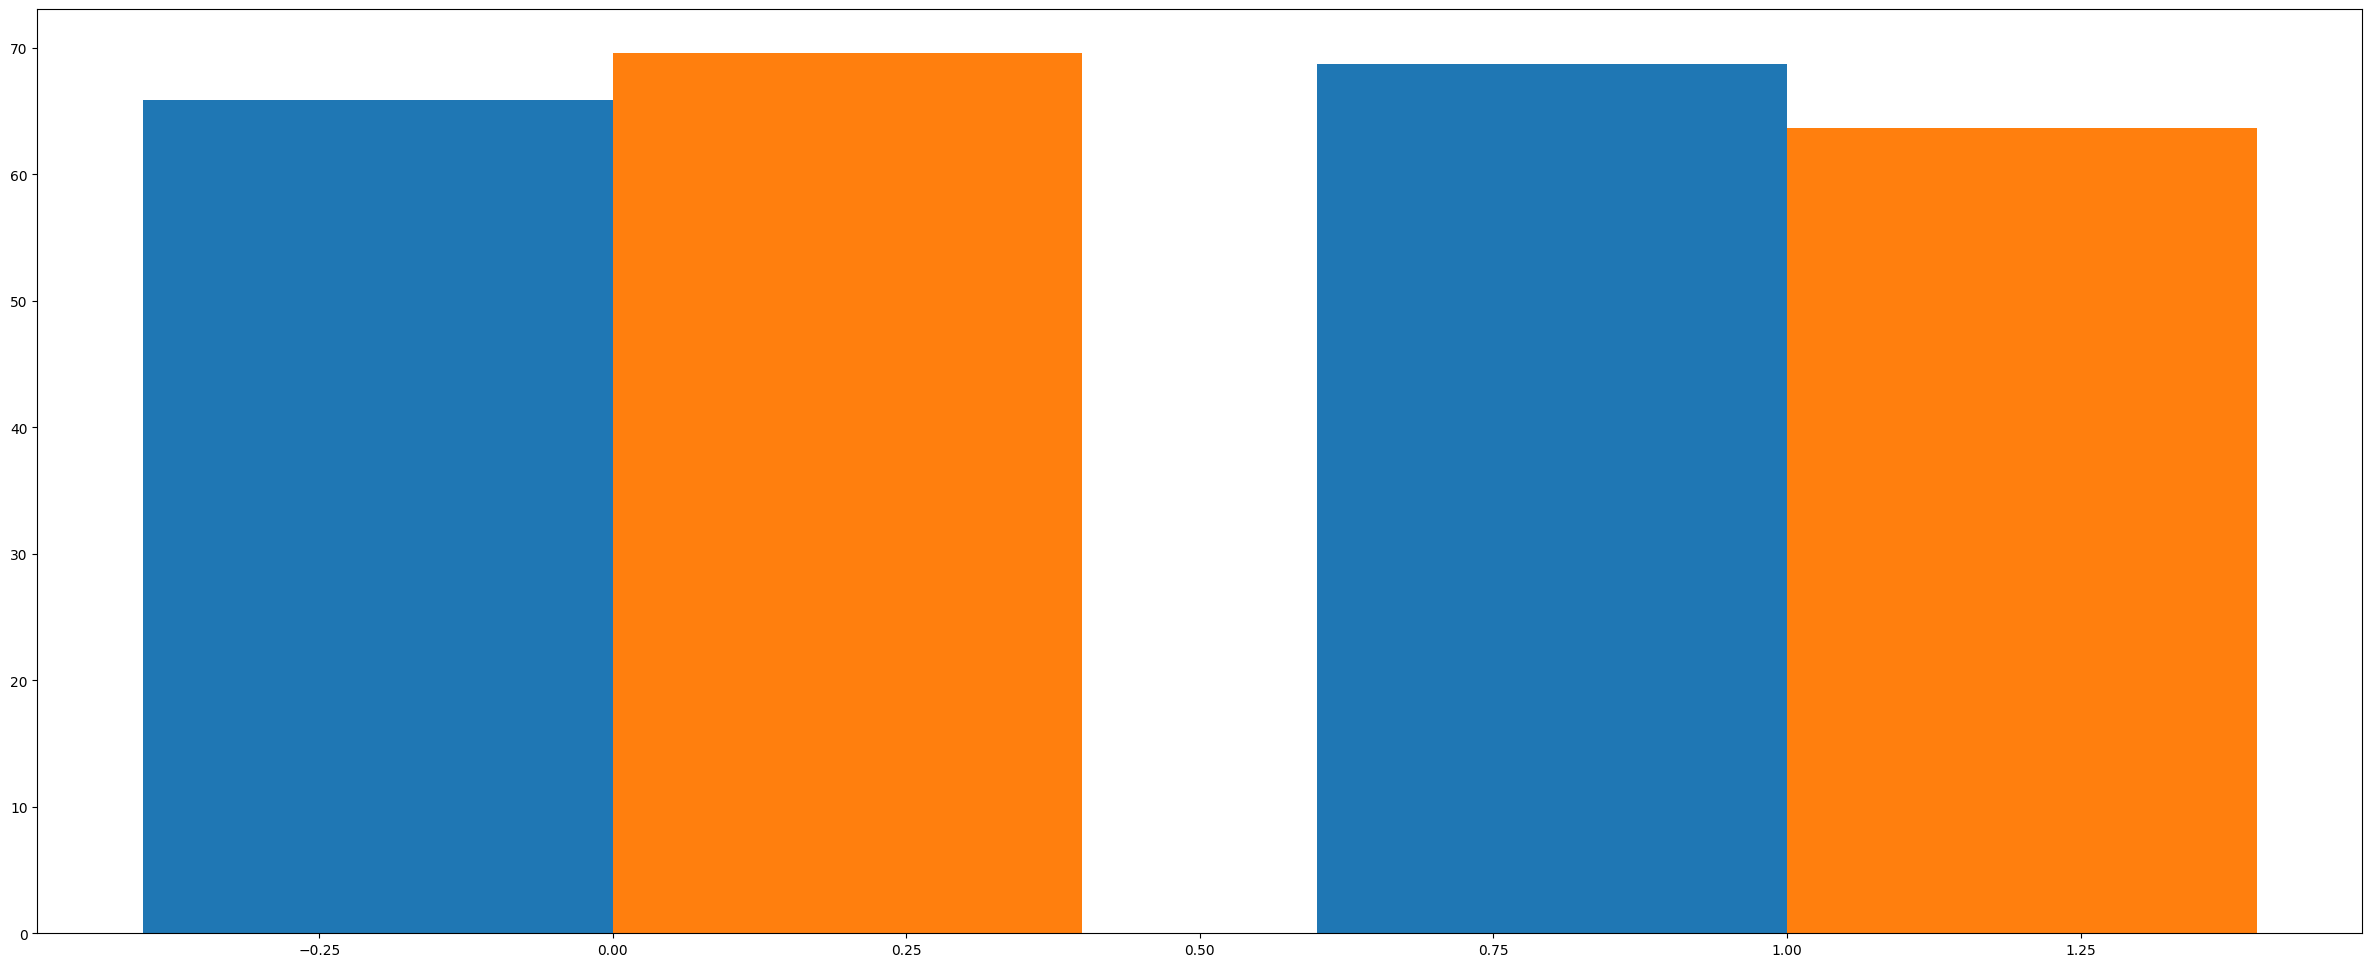

In [124]:
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')

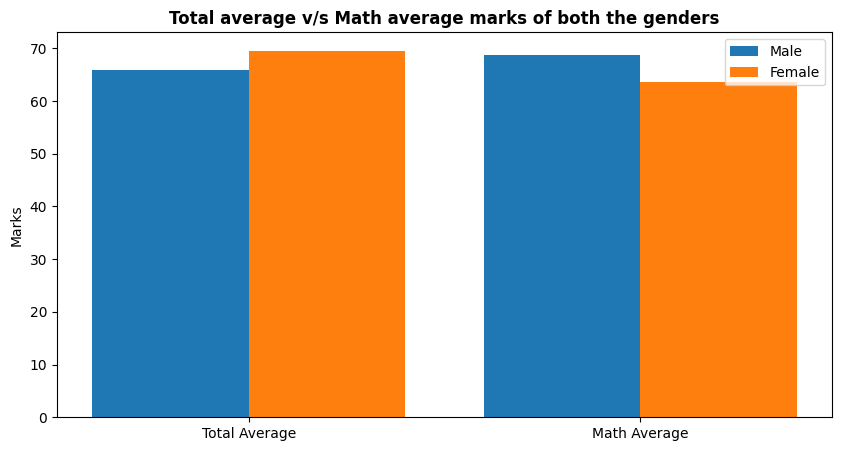

In [121]:
plt.figure(figsize=(10, 5))

X = ['Total Average','Math Average']


female_scores = [gender_group['average'][0], gender_group['math score'][0]]
male_scores = [gender_group['average'][1], gender_group['math score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

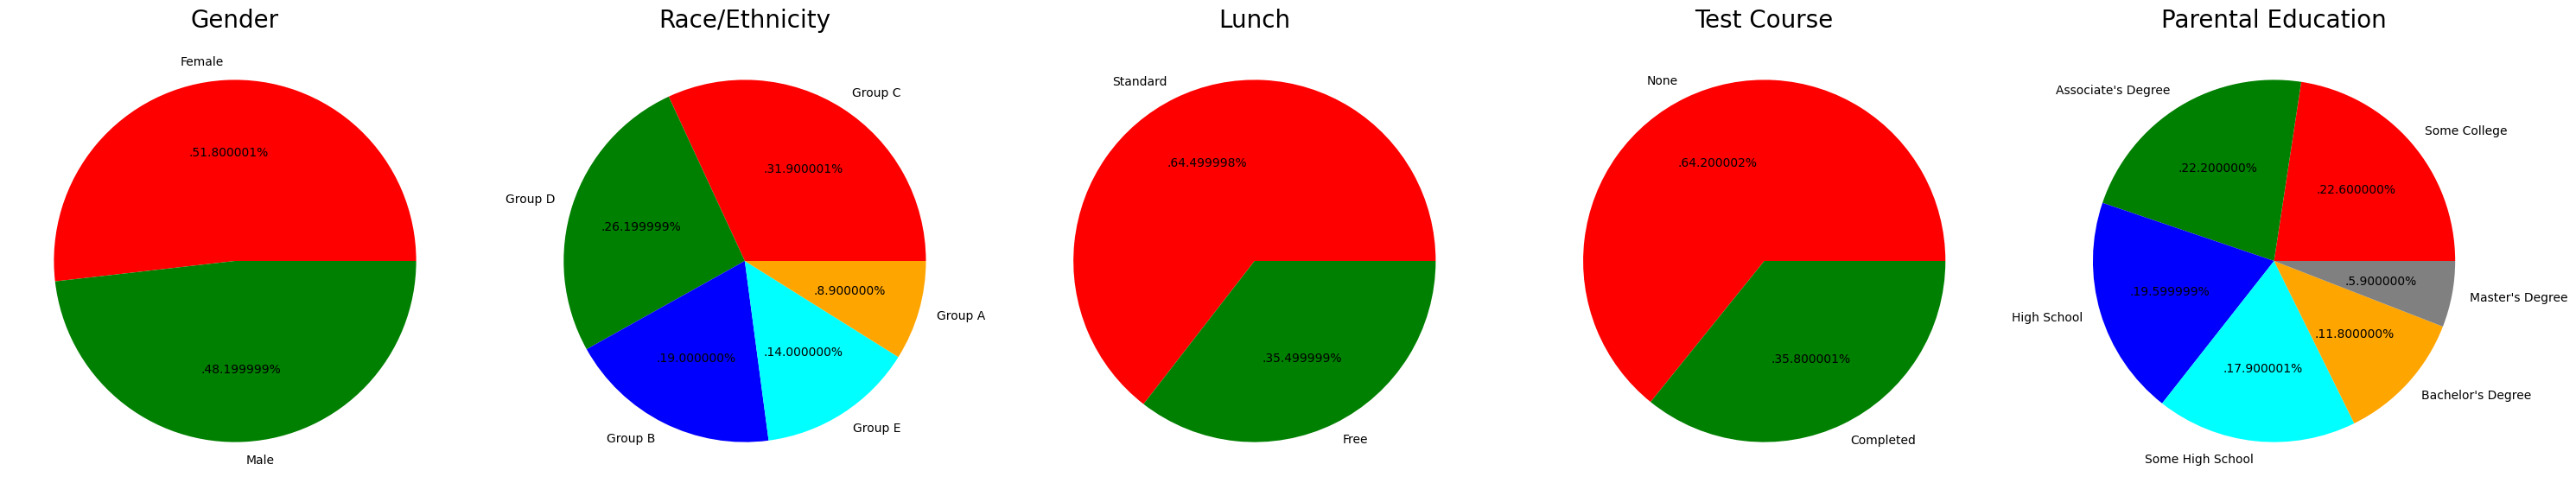

In [91]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()